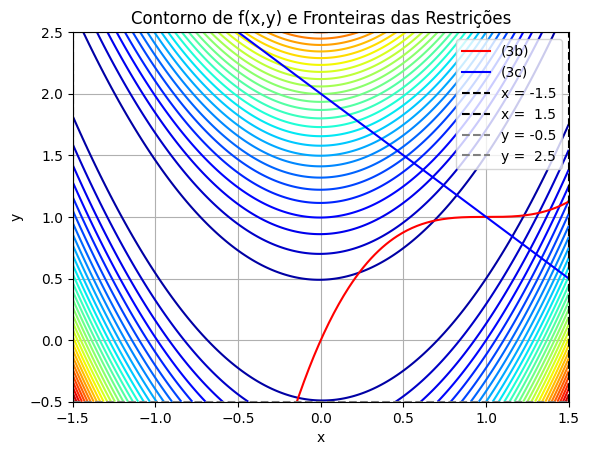

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Criar a malha (grid) no domínio indicado:
x_vals = np.linspace(-1.5, 1.5, 200)  # 200 pontos entre -1.5 e 1.5
y_vals = np.linspace(-0.5, 2.5, 200)  # 200 pontos entre -0.5 e 2.5

X, Y = np.meshgrid(x_vals, y_vals)

# 2) Calcular f(x,y) na malha e plotar o contorno
f = (1 - X)**2 + 100*(Y - X**2)**2
plt.contour(X, Y, f, levels=30, cmap='jet')  
# levels=30 -> densidade de contornos; cmap='jet' -> coloração

# 3) Traçar curvas de fronteira das restrições:
# (3b) => (x -1)^3 - y +1 = 0 -> y = (x-1)^3 + 1
x_b = np.linspace(-1.5, 1.5, 400)
y_b = (x_b - 1)**3 + 1
plt.plot(x_b, y_b, 'r', label='(3b)')

# (3c) => x + y -2 = 0 -> y = 2 - x
x_c = np.linspace(-1.5, 1.5, 400)
y_c = 2 - x_c
plt.plot(x_c, y_c, 'b', label='(3c)')

# (3d) => -1.5 <= x <= 1.5 -> desenhar linhas verticais
plt.axvline(-1.5, color='black', linestyle='--', label='x = -1.5')
plt.axvline( 1.5, color='black', linestyle='--', label='x =  1.5')

# (3e) => -0.5 <= y <= 2.5 -> desenhar linhas horizontais
plt.axhline(-0.5, color='gray', linestyle='--', label='y = -0.5')
plt.axhline( 2.5, color='gray', linestyle='--', label='y =  2.5')

# 4) Ajustes e exibição:
plt.xlim([-1.5, 1.5])
plt.ylim([-0.5, 2.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contorno de f(x,y) e Fronteiras das Restrições')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np
from scipy.optimize import minimize

# Definição da função objetivo
def f_obj(xy):
    x, y = xy
    return (1 - x)**2 + 100*(y - x**2)**2

# Definição das restrições g_i(x,y) <= 0
def g_funcs(xy):
    x, y = xy
    return np.array([
        (x - 1)**3 - y + 1,   # g1
        x + y - 2,           # g2
        x - 1.5,             # g3 (x <= 1.5)
        -x - 1.5,            # g4 (x >= -1.5)
        y - 2.5,             # g5 (y <= 2.5)
        -y - 0.5             # g6 (y >= -0.5)
    ])

# Função de penalidade interior (evita dividir por zero)
def interior_penalty(xy, u):
    val_f = f_obj(xy)
    g_vals = g_funcs(xy)
    
    penalty = 0.0
    eps = 1e-13  # tolerância para evitar divisão por zero exata
    
    for gi in g_vals:
        # Se g_i >= 0, significa que o ponto não está no interior
        if gi >= 0:
            return np.inf
        
        if gi > -eps:
            gi = -eps
        
        penalty += -u / gi 
    
    return val_f + penalty

# Parâmetros do método
u = 1         # penalidade inicial
alpha = 1     # fator de crescimento da penalidade
precisao = 1e-13
max_iter = 100

# Ponto inicial 
x0 = np.array([0.5, 1])
#print("g(x0) =", g_funcs(x0))

# Loop do método
x_atual = x0.copy()
x_old   = np.inf * np.ones_like(x_atual)
num_iter = 0

while num_iter < max_iter:
    num_iter += 1
    
    def func_penalizada(x):
        return interior_penalty(x, u)
    
    res = minimize(func_penalizada, x_atual, method='Nelder-Mead')
    x_novo = res.x
    
    # Critério de parada: variação relativa
    if np.linalg.norm(x_novo - x_old) / (1.0 + np.linalg.norm(x_novo)) < precisao:
        x_atual = x_novo
        break
    
    x_old = x_novo
    x_atual = x_novo
    
    # Aumenta a penalidade
    u *= alpha

# Resultado final
print("Resultado Final")
print("Número de iterações:", num_iter)
print("x* =", x_atual)
print("f(x*) =", f_obj(x_atual))
print("g(x*):", g_funcs(x_atual))
print("Penalidade final u:", u)


Resultado Final
Número de iterações: 2
x* = [0.83423424 1.06942821]
f(x*) = 13.976317241407916
g(x*): [-0.07398317 -0.09633755 -0.66576576 -2.33423424 -1.43057179 -1.56942821]
Penalidade final u: 1


In [2]:
import numpy as np
from scipy.optimize import minimize

# Definição da função objetivo
def f_obj(xy):
    x, y = xy
    return (1 - x)**2 + 100*(y - x**2)**2

def cons():
    def g1(xy): return -( (xy[0]-1)**3 - xy[1] + 1 )   # g1 <= 0 => -g1 >=0
    def g2(xy): return -( xy[0] + xy[1] - 2 )
    def g3(xy): return -( xy[0] - 1.5 )   # x <= 1.5 => x-1.5 <=0 => -(x-1.5) >= 0
    def g4(xy): return -(-xy[0] - 1.5 )
    def g5(xy): return -( xy[1] - 2.5 )
    def g6(xy): return -(-xy[1] - 0.5 )
    
    return [
        {"type": "ineq", "fun": g1}, 
        {"type": "ineq", "fun": g2}, 
        {"type": "ineq", "fun": g3},
        {"type": "ineq", "fun": g4},
        {"type": "ineq", "fun": g5},
        {"type": "ineq", "fun": g6},
    ]

# Ponto inicial
x0 = np.array([0.5, 1.0])

resultado = minimize(f_obj, x0, method='SLSQP', constraints=cons())

print("Resultado Final")
print("x* =", resultado.x)
print("f(x*) =", resultado.fun)
print("Sucesso:", resultado.success)
print("Motivo do término:", resultado.message)
print("Número de iterações:", resultado.nit)



***** RESULTADO *****
x* = [0.99999967 1.00000033]
f(x*) = 9.914816552283568e-11
Sucesso: True
Motivo do término: Optimization terminated successfully
Número de iterações: 4
